In [1]:
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
%matplotlib inline
# seaborn for some special plots
import seaborn as sns
#datetime for datetime operations.
from datetime import date
#ignore the warnings  
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
# for silhouette scores calculation
from sklearn.metrics import silhouette_score, silhouette_samples
#libraries for plotting
import matplotlib.cm as cm
import plotly.express as px




In [2]:
data= pd.read_csv("MARKET.csv",delimiter=';')

In [3]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [4]:
df = data.copy()
df.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [8]:
missing_value_df

column_name  percent_missing
ID                                    ID         0.000000
Year_Birth                    Year_Birth         0.000000
Education                      Education         0.000000
Marital_Status            Marital_Status         0.000000
Income                            Income         1.071429
Kidhome                          Kidhome         0.000000
Teenhome                        Teenhome         0.000000
Dt_Customer                  Dt_Customer         0.000000
Recency                          Recency         0.000000
MntWines                        MntWines         0.000000
MntFruits                      MntFruits         0.000000
MntMeatProducts          MntMeatProducts         0.000000
MntFishProducts          MntFishProducts         0.000000
MntSweetProducts        MntSweetProducts         0.000000
MntGoldProds                MntGoldProds         0.000000
NumDealsPurchases      NumDealsPurchases         0.000000
NumWebPurchases          NumWebPurchases         0.000000
NumCatalogPurchases  NumCatalogPurchases         0.000000
NumStorePurchases      NumStorePurchases         0.000000
NumWebVisitsMonth      NumWebVisitsMonth         0.000000
AcceptedCmp3                AcceptedCmp3         0.000000
AcceptedCmp4                AcceptedCmp4         0.000000
AcceptedCmp5                AcceptedCmp5         0.000000
AcceptedCmp1                AcceptedCmp1         0.000000
AcceptedCmp2                AcceptedCmp2         0.000000
Complain                        Complain         0.000000
Z_CostContact              Z_CostContact         0.000000
Z_Revenue                      Z_Revenue         0.000000
Response                        Response         0.000000

In [9]:
df['Income']=df['Income'].fillna(df['Income'].mean())

In [10]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [11]:
df["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

In [12]:
type(df.Dt_Customer[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

<Axes: >

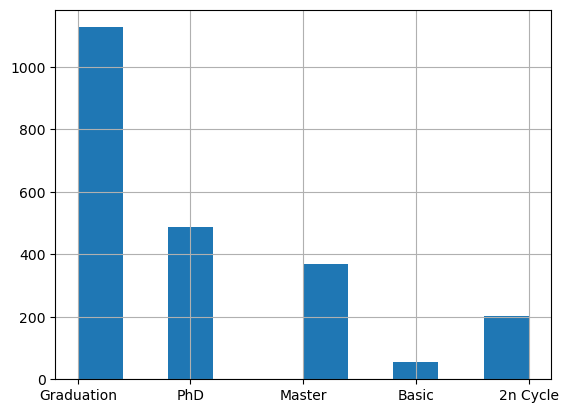

In [14]:
df['Education'].hist()

In [15]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

<Axes: >

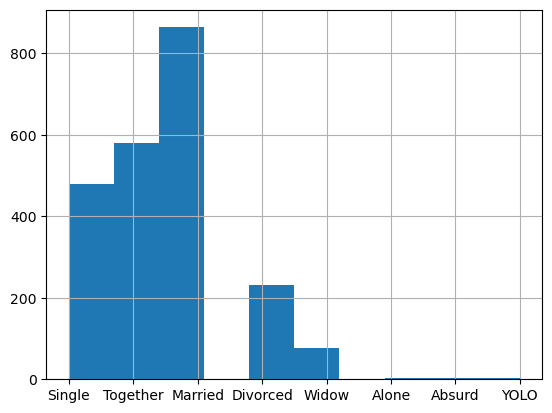

In [16]:
df['Marital_Status'].hist()

<Figure size 800x800 with 0 Axes>

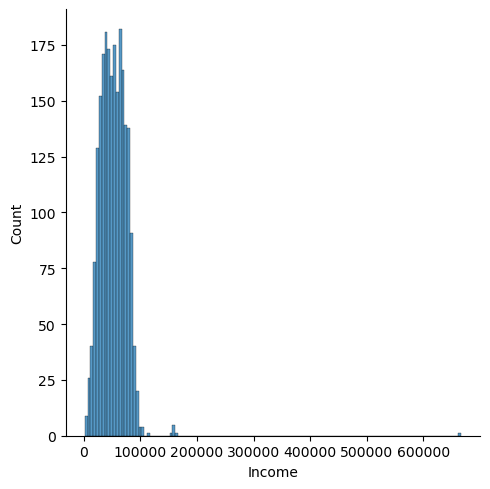

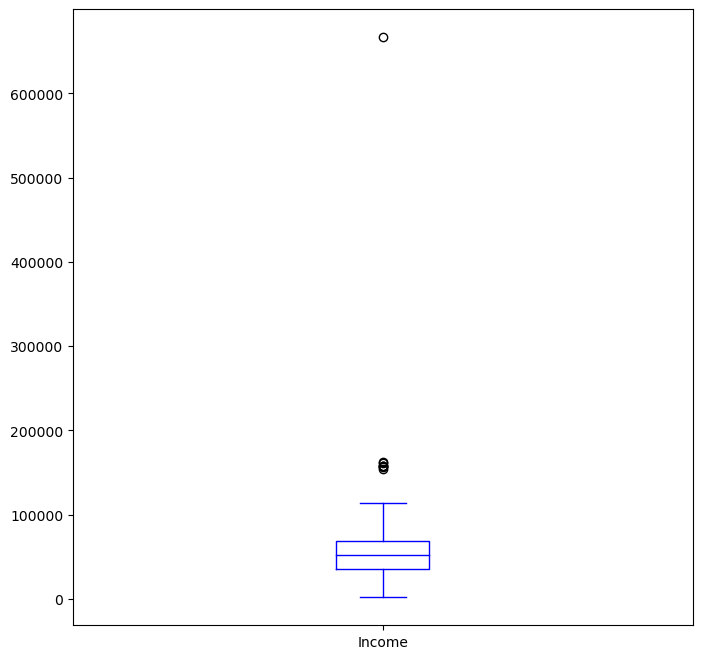

In [17]:
plt.figure(figsize=(8,8))
#for displot we simply use sns. 
sns.displot(df["Income"])
plt.show()
# we will also use box plot to interpret this data, dont worry more on this in a while.
df["Income"].plot.box(figsize=(8,8),color = 'blue')
plt.show()


In [18]:
print(df['Kidhome'].unique())
print(df['Teenhome'].unique())

[0 1 2]
[0 1 2]


<Axes: >

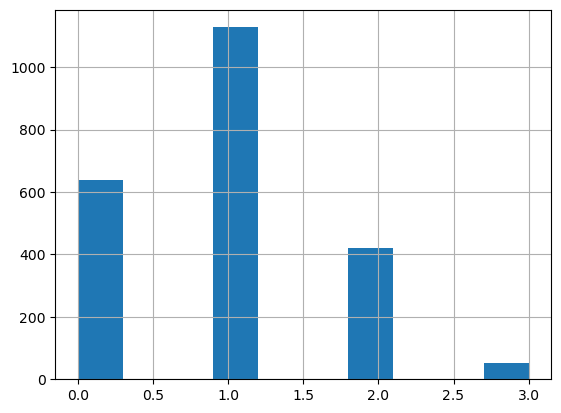

In [19]:
df['Children'] = df['Kidhome'] + df['Teenhome']
#lets plot this col and get some insight
df['Children'] .hist()

In [20]:
df= df.drop(['Kidhome','Teenhome'], axis=1)

In [21]:
mntCols=[col for col in df.columns if 'Mnt' in col]
print(mntCols)

['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


In [22]:
df['CombinedExpense'] = df.loc[:,mntCols].sum(axis=1)
#lets drop all the mntCols now
df= df.drop(mntCols, axis=1)

<Axes: >

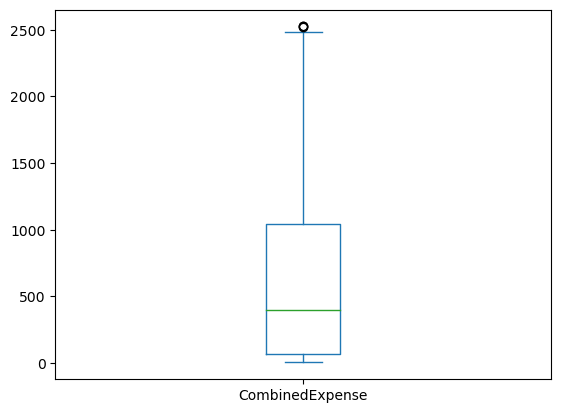

In [23]:
df['CombinedExpense'].plot.box()

In [24]:
acceptedCols =[col for col in df.columns if "Accepted" in col]
print(acceptedCols)


['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']


In [25]:
df['AllCamps']= df.loc[:,acceptedCols].sum(axis=1)

<Axes: >

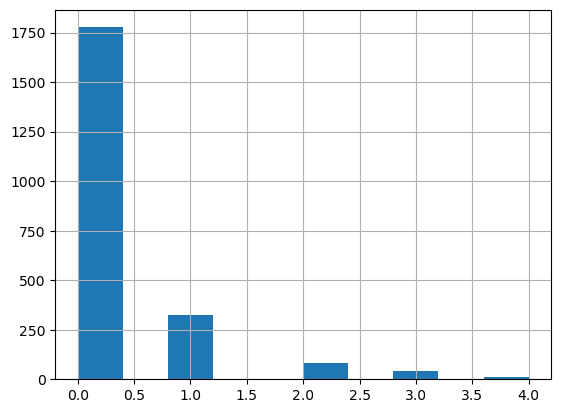

In [26]:
df['AllCamps'].hist()

In [27]:
purchases= [col for col in df.columns if "Purchase" in col]
purchases

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases']

In [28]:
sizes=[]
labels=[]
# lets fill the lists using loops.
for pur in purchases:
    sizes.append(df[pur].sum())
    labels.append(pur)

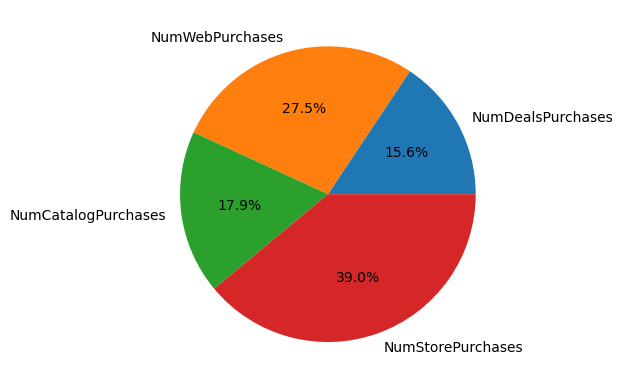

In [29]:
plt.pie(sizes, labels=labels,autopct='%1.1f%%')

plt.show()

In [30]:
from sklearn import preprocessing
#lets import the label encoder to use
lEncoder = preprocessing.LabelEncoder()

#we will encode both of the categorical columns in the data
df['Education']=df[['Education']].apply(lEncoder.fit_transform)
df['Marital_Status']=df[['Marital_Status']].apply(lEncoder.fit_transform)




In [31]:
df= df.drop(['Dt_Customer'], axis=1)

In [32]:
from sklearn.preprocessing import StandardScaler
#create a standard scaler 
standScaler = StandardScaler()
# lets fir our data to all the data columns
standScaler.fit(df)
# lets create a new dataframe with the scaled data.
scaled_ds = pd.DataFrame(standScaler.transform(df),columns= df.columns )
scaled_ds

ID  Year_Birth  Education  Marital_Status     Income   Recency  \
0    -0.020999   -0.985345  -0.350141        0.251004   0.235327  0.307039   
1    -1.053058   -1.235733  -0.350141        0.251004  -0.235826 -0.383664   
2    -0.447070   -0.317643  -0.350141        1.180340   0.773633 -0.798086   
3     0.181716    1.268149  -0.350141        1.180340  -1.022732 -0.798086   
4    -0.082614    1.017761   1.428354       -0.678332   0.241519  1.550305   
5     0.571126   -0.150717   0.539106        1.180340   0.410102 -1.143438   
6    -1.425523    0.183134  -0.350141       -1.607669   0.135336 -0.521805   
7     0.180176    1.351612   1.428354       -0.678332  -0.750763 -0.590875   
8    -0.227102    0.433522   1.428354        1.180340  -0.874723 -1.039832   
9     0.094531   -1.569584   1.428354        1.180340  -1.861572  0.652391   
10   -1.108512    1.184687  -0.350141       -0.678332   0.000000 -1.316114   
11   -1.603592    0.600447  -1.239389       -0.678332  -1.787587  0.341574   
12   -1.068154   -0.818419  -0.350141       -1.607669   0.430875  1.135883   
13    0.797255   -1.402658   0.539106       -1.607669   0.283904  0.134363   
14   -0.931367    1.518538  -0.350141       -0.678332  -1.395173 -0.383664   
15   -1.071542   -1.903435   1.428354        0.251004   1.220538 -0.901692   
16    1.276624    0.934298  -0.350141       -0.678332  -0.415355  0.065293   
17   -0.201224   -1.903435  -0.350141        1.180340  -0.578744 -1.005297   
18    0.299710   -1.653047   0.539106       -0.678332   0.988636  1.446700   
19   -1.021018    1.351612  -2.128637        0.251004  -0.736461  1.274024   
20    1.160786    1.101224  -0.350141       -0.678332  -0.607507 -0.280059   
21   -0.066594    0.850836  -0.350141       -0.678332  -1.989447 -0.245523   
22   -1.108820   -1.653047   1.428354       -0.678332   0.254063  0.479715   
23   -0.476029   -1.235733   1.428354       -0.678332   0.522397 -1.696001   
24   -1.288737   -1.486121  -0.350141        1.180340  -0.461735  0.686926   
25    0.708529    0.016208  -0.350141        0.251004  -1.344598  1.377630   
26   -0.982200    0.600447  -0.350141       -0.678332   0.044413 -1.557860   
27   -0.103871    1.435075  -0.350141        0.251004   0.000000 -1.039832   
28    1.179887    1.685463  -0.350141       -0.678332  -0.554775 -0.798086   
29   -1.117138   -0.317643   1.428354       -0.678332   1.293164  1.619376   
30    0.391825    1.685463   0.539106       -1.607669  -1.648606 -0.521805   
31   -0.788419   -0.484568   0.539106        1.180340  -0.544389  0.237969   
32    0.036304    0.099671  -0.350141        1.180340  -0.467368 -0.625410   
33    0.548637   -1.402658   1.428354       -1.607669  -0.225200 -1.419719   
34    0.974400   -1.903435   0.539106       -0.678332   0.655545 -1.557860   
35    1.585317   -1.486121   0.539106        0.251004  -0.114183  0.203434   
36   -0.386070    0.099671   1.428354       -0.678332   0.603453 -0.418199   
37    1.590554    0.600447  -2.128637       -0.678332  -1.139702  0.928672   
38    0.925107    0.350059  -0.350141        2.109676  -0.392225  1.722981   
39   -0.808444   -2.153823   1.428354       -1.607669  -0.131800  0.134363   
40    0.926956    0.934298  -0.350141       -0.678332   1.109121 -1.592395   
41   -1.567855    1.351612   0.539106       -0.678332  -1.265899  1.343094   
42    0.874274   -0.985345  -0.350141        1.180340  -1.208573 -1.557860   
43    0.520294   -0.818419   1.428354        0.251004   0.000000  1.066813   
44   -1.063841    0.516985   0.539106       -0.678332  -1.787587 -1.039832   
45   -1.300444    0.600447  -0.350141        0.251004   1.106325  0.790532   
46    1.329921    2.269702  -2.128637       -0.678332  -1.787587 -0.867157   
47    0.521834   -0.067255  -0.350141        1.180340  -0.420229  1.481235   
48    0.508895   -1.486121  -0.350141        0.251004   0.000000  1.619376   
49    0.300018   -1.235733   1.428354       -0.678332   0.811065 -0.349129   
50    0.930961   -0.985345  -0.350

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=3)
#lets fit the pca on our scaled dataframe.
pca.fit(scaled_ds)
#create a dataframe from the newly created PCA results.
newPCs = pd.DataFrame(pca.transform(scaled_ds), columns=(["new1","new2","new3"]))

In [35]:
newPCs.head(5)

new1      new2      new3
0  1.946564 -0.816412  0.912073
1 -1.917963  0.203521 -0.077702
2  1.048072 -1.690440 -0.343867
3 -1.934049  0.554633 -0.962039
4 -0.459518 -0.820901  0.930047

In [36]:
from yellowbrick.cluster import KElbowVisualizer
#import the k means clustering model
from sklearn.cluster import KMeans

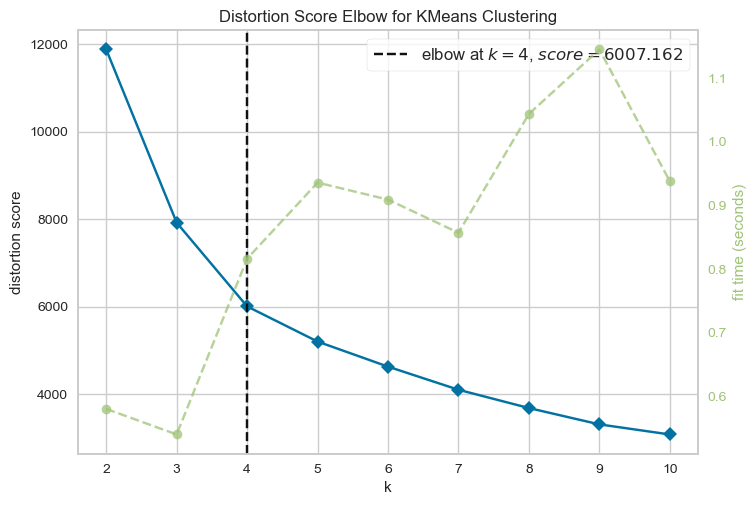

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
Elbow = KElbowVisualizer(KMeans(), k=10)
#fit the k means model
Elbow.fit(newPCs)
#lets show the plot
Elbow.show()

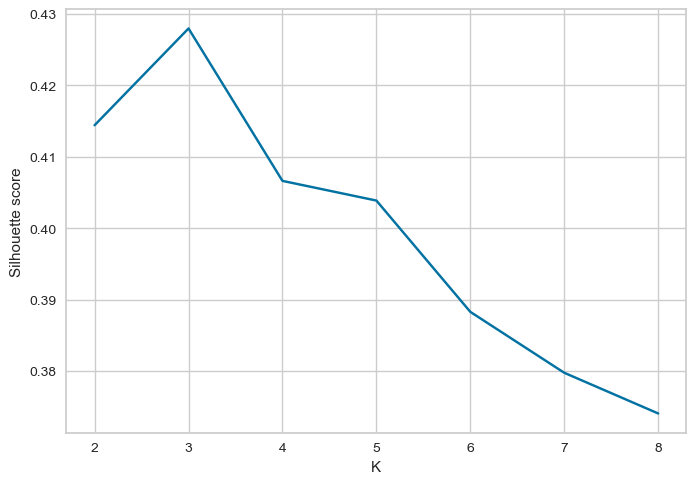

In [38]:
from sklearn.metrics import silhouette_score
clusterRange = [2, 3, 4, 5, 6, 7, 8]
avgSilhouette = []
for numClusters in clusterRange:
 
 # initialise kmeans
 kmeans= KMeans(n_clusters=numClusters)
 kmeans.fit(newPCs)
 clusterLabels = kmeans.labels_
 avgSilhouette.append(silhouette_score(newPCs, clusterLabels))


 # silhouette score
plt.plot(clusterRange,avgSilhouette)
plt.xlabel('K') 
plt.ylabel('Silhouette score') 
plt.show()

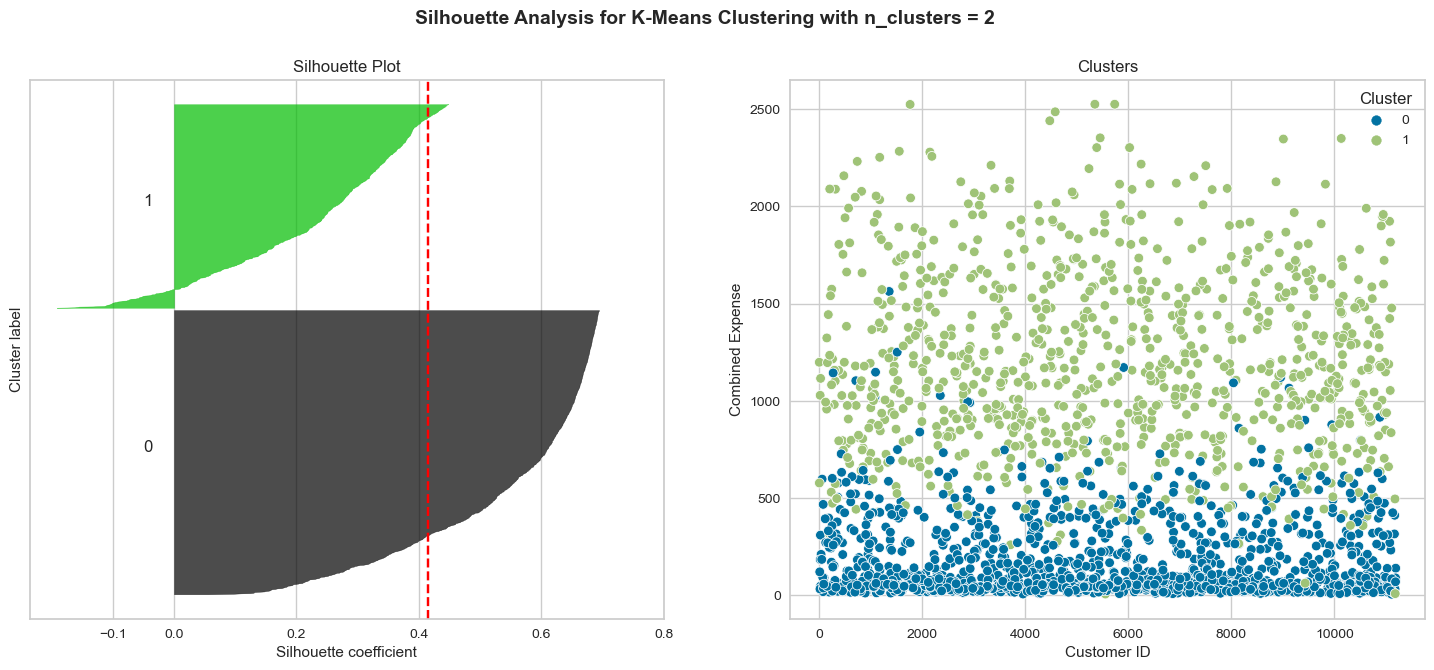

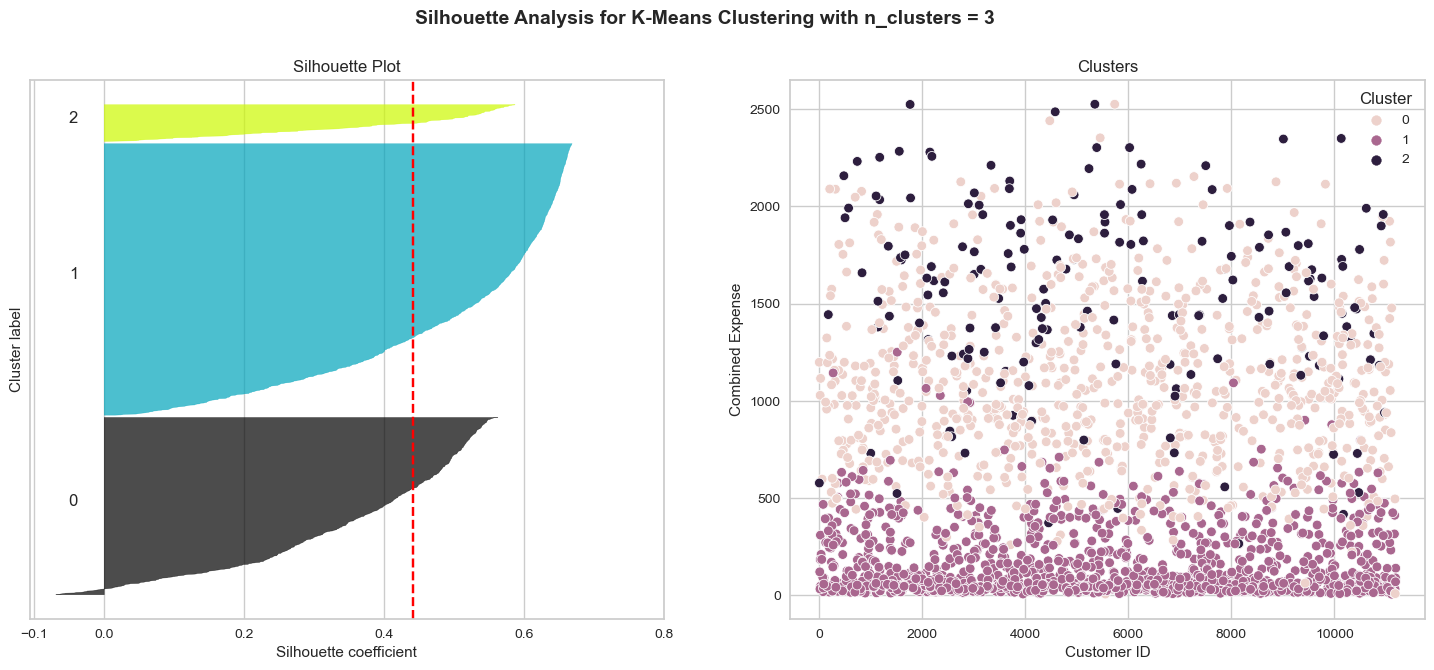

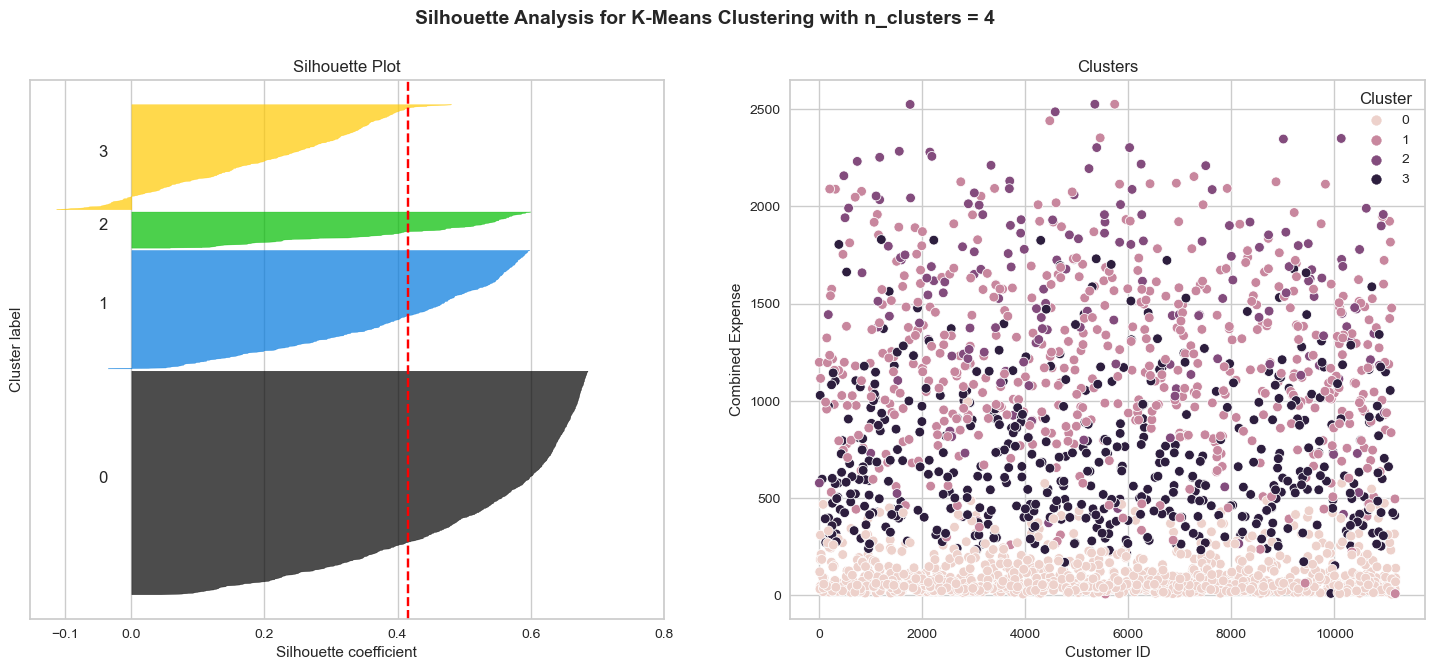

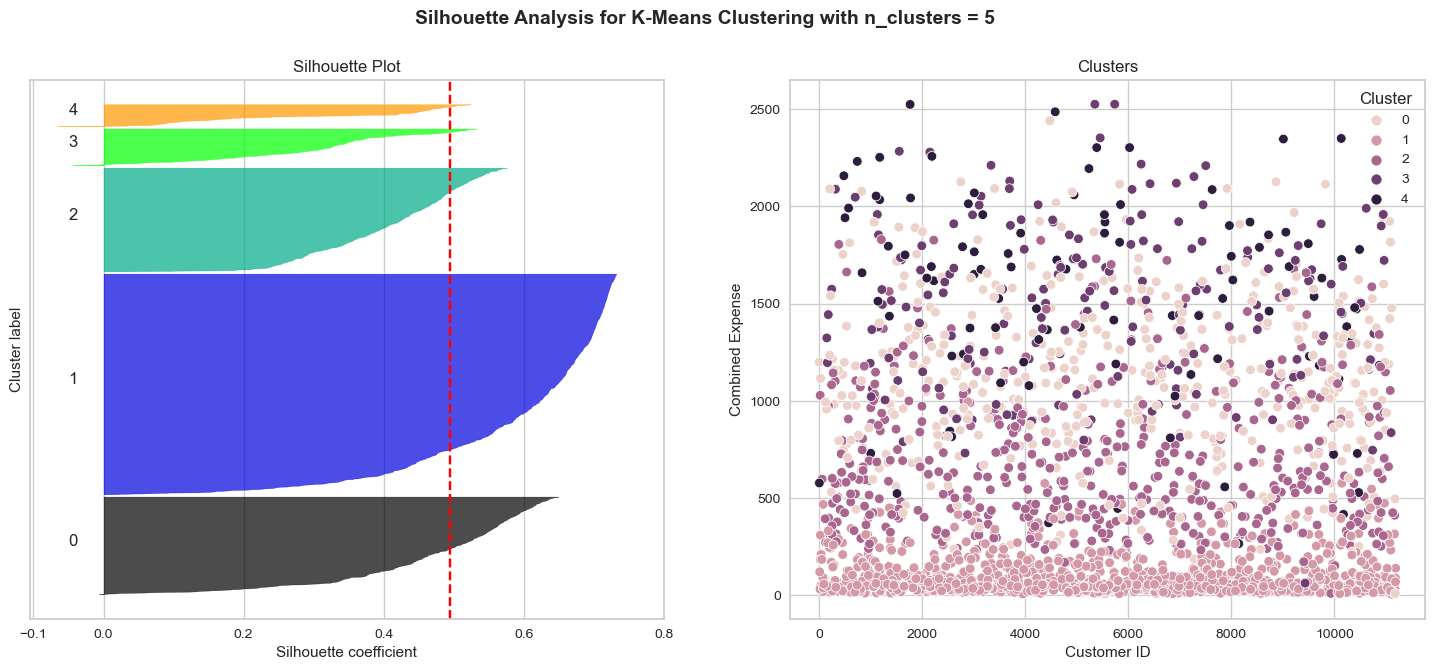

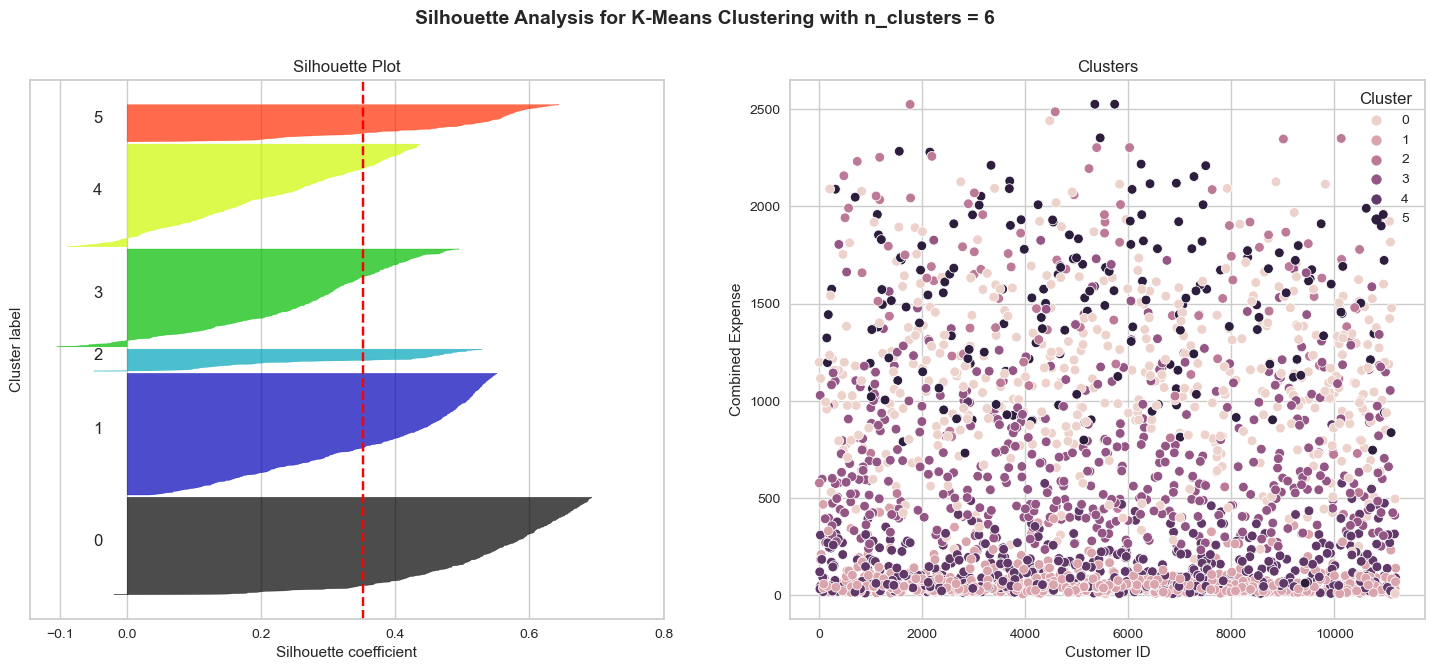

In [39]:
n_clusters = [2, 3, 4, 5, 6]

# consider an array of the data
X = newPCs

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    

    # label the cluster centers
    newPCs['cluster']=cluster_labels
    
    

    fig.show()
    df['Cluster']=cluster_labels
    sns.scatterplot(x='ID',y='CombinedExpense', data=df, hue='Cluster')
    

    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("Customer ID")
    ax2.set_ylabel("Combined Expense")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

In [40]:
from sklearn.cluster import KMeans
#create the k means model, with k=4.
kmeansRes = KMeans(n_clusters=4, random_state=0, n_init="auto").fit_predict(newPCs)

In [41]:
df["Cluster"] = kmeansRes

In [56]:
newPCs.head(5)

new1      new2      new3  cluster
0  1.946583 -0.821234  0.898674        5
1 -1.917953  0.204896 -0.076237        1
2  1.048061 -1.690496 -0.339323        5
3 -1.934050  0.556413 -0.959027        1
4 -0.459514 -0.820556  0.930703        3